#### Desafio: Pipeline de dados
1. Ler os dados da empresa A;
2. Ler os dados da empresa B;
3. Realizar tratamentos necessários;
4. Disponibilizar os dados a área de negócio.

#### Importando libs

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

#### Carregando dados

In [39]:
path_data_empresa_a = '../data/raw/dados_empresaA.json'
path_data_empresa_b = '../data/raw/dados_empresaB.csv'

In [40]:
df_empresa_a = pd.read_json(
    path_data_empresa_a
)

df_empresa_a.head(3)

,Nome do Produto,Categoria do Produto,Preço do Produto (R$),Quantidade em Estoque,Filial
0,Blush em pó,Eletrodomésticos,79.41,7,Filial 7
1,Lápis de sobrancelha,Eletrodomésticos,85.47,78,Filial 8
2,Base líquida,Roupas,75.02,34,Filial 8


In [41]:
df_empresa_b = pd.read_csv(
    path_data_empresa_b
)

df_empresa_b.head(3)

,Nome do Item,Classificação do Produto,Valor em Reais (R$),Quantidade em Estoque,Nome da Loja,Data da Venda
0,Lápis de sobrancelha,Roupas,55.17,62,Filial 1,2023-04-13 18:58:06.794203
1,Batom matte,Eletrônicos,74.15,48,Filial 9,2023-06-03 18:58:06.794203
2,Corretivo,Roupas,54.86,36,Filial 5,2023-06-08 18:58:06.794203


#### Normalizando e unindo df's

> Identificado que as origens estão em formatos e estruturas diferentes

In [42]:
df_empresa_a = df_empresa_a.rename(
    columns={
        'Nome do Produto': 'Nome do Item',
        'Categoria do Produto': 'Classificação do Produto',
        'Preço do Produto (R$)': 'Valor em Reais (R$)',
        'Quantidade em Estoque': 'Quantidade em Estoque',
        'Filial': 'Nome da Loja'
    }
) 

df_empresa_a['Data da Venda'] = None

In [43]:
df_empresas = pd.concat([df_empresa_a, df_empresa_b]).reset_index(drop=True)

df_empresas.head(3)

,Nome do Item,Classificação do Produto,Valor em Reais (R$),Quantidade em Estoque,Nome da Loja,Data da Venda
0,Blush em pó,Eletrodomésticos,79.41,7,Filial 7,None
1,Lápis de sobrancelha,Eletrodomésticos,85.47,78,Filial 8,None
2,Base líquida,Roupas,75.02,34,Filial 8,None


#### Gerando algumas visualizações

In [71]:
df_empresas.dtypes

Nome do Item                 object
Classificação do Produto     object
Valor em Reais (R$)         float64
Quantidade em Estoque         int64
Nome da Loja                 object
Data da Venda                object
dtype: object

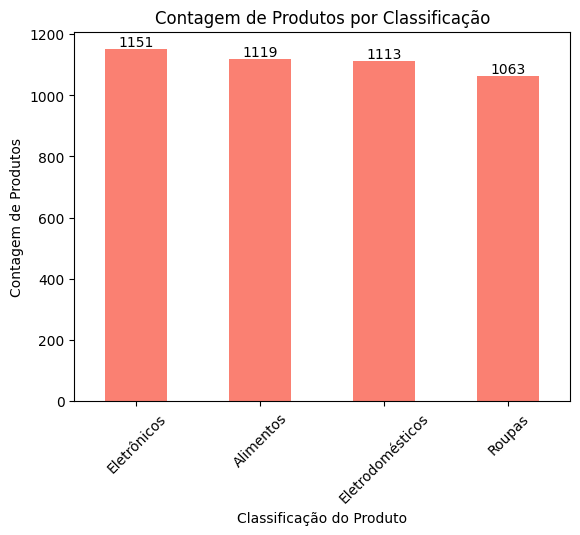

In [77]:
contagem_por_classificacao = df_empresas['Classificação do Produto'].value_counts().sort_values(ascending=False)
contagem_por_classificacao = contagem_por_classificacao.plot(kind='bar', title='Contagem de Produtos por Classificação', color='salmon')
plt.xlabel('Classificação do Produto')
plt.ylabel('Contagem de Produtos')
plt.xticks(rotation=45)
plt.bar_label(contagem_por_classificacao.containers[0], fmt="%d", size=10, label_type="edge")
plt.show()

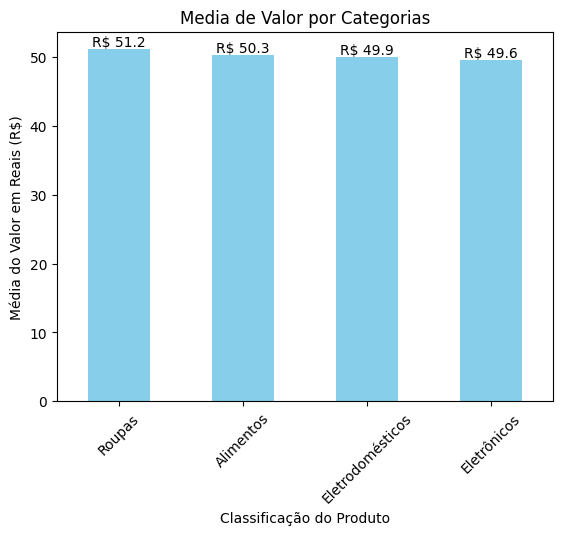

In [76]:
media_por_categoria = df_empresas.groupby('Classificação do Produto')['Quantidade em Estoque'].mean().sort_values(ascending=False)
media_valor = media_por_categoria.plot(kind='bar', title='Media de Valor por Categorias', color='skyblue')
plt.xlabel('Classificação do Produto')
plt.ylabel('Média do Valor em Reais (R$)')
plt.xticks(rotation=45)
plt.bar_label(media_valor.containers[0], fmt="R$ %.01f", size=10, label_type="edge")
plt.show()

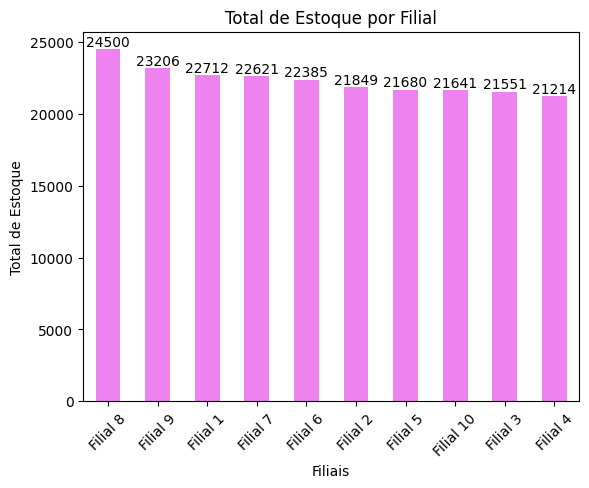

In [75]:
estoque_por_filia = df_empresas.groupby('Nome da Loja')['Quantidade em Estoque'].sum().sort_values(ascending=False)
total_estoque = estoque_por_filia.plot(kind='bar', title='Total de Estoque por Filial', color='violet')
plt.xlabel('Filiais')
plt.ylabel('Total de Estoque')
plt.xticks(rotation=45)
plt.bar_label(total_estoque.containers[0], fmt="%d", size=10, label_type="edge")
plt.show()

##### Salvando dados tratados

In [79]:
df_empresas.to_csv('../data/context/dados_empresas.csv', index=False)